<a href="https://colab.research.google.com/github/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/Visual-property-mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Mapping Styles to Attributes

Harsh Sharma

2025-01-17

**Cytoscape is an open source software platform for integrating, visualizing, and analyzing measurement data in the context of networks.**

This tutorial intends to introduce Mapping visual properties to attributes in `p4cytoscape`.
By the end of the tutorial you will have all the context needed to use the documentation for dynamic visualizations.


## Prerequisites for the tutorial

1. [Cytoscape Sotftware](https://cytoscape.org/)
2. py4cytoscape library
3. [StringApp](https://apps.cytoscape.org/apps/stringapp) 2.2.0 +


In [4]:
%%capture
!python3 -m pip install py4cytoscape

If you are using a remote notebook environment such as Google Colab, please execute the cell below. (If you're running on your local notebook, you don't need to do that.)



In [2]:
#_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@1.11.0' # optional
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


Loading Javascript client ... 7f352594-04a1-4cbb-9f58-8c3510ce7c15 on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

## Importing Py4cytoscape

Before running any py4cytoscape functions, make sure Cytoscape is already running on your computer—whether you’re working in a local notebook or on Colab. **Pro Tip:** After launching Cytoscape, wait about 60 seconds to allow it to fully initialize; otherwise, py4cytoscape might not be able to connect properly.

In [2]:
import py4cytoscape as p4c

In [ ]:
# If you have any previous version of StringApp, use the following code to update it.
# p4c.update_app('stringApp')

# Install the lastest version of StringApp
p4c.install_app('stringApp')

In [3]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.3',
 'automationAPIVersion': '1.11.0',
 'py4cytoscapeVersion': '1.11.0'}

Applying default style...
Applying preferred layout


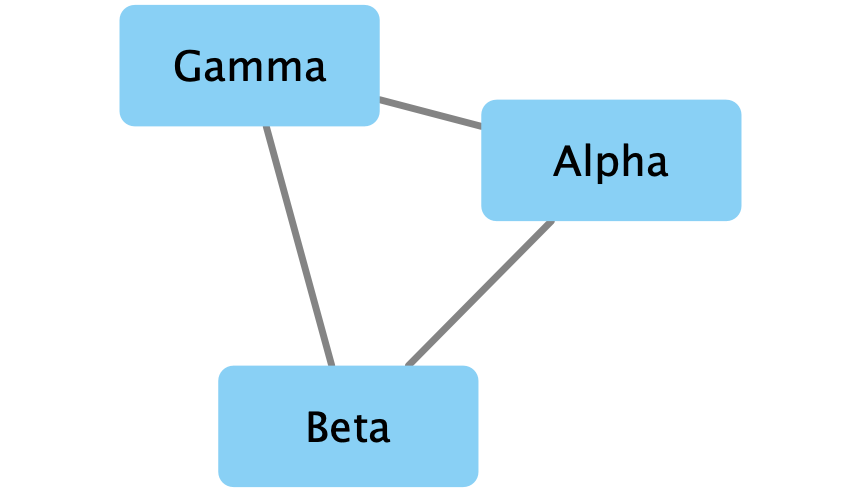

In [13]:
import pandas as pd

# 1. Create dummy network data with updated attributes:
# The nodes DataFrame now includes:
# - 'id': A unique identifier for each node.
# - 'type': Determines the node fill color via discrete mapping.
# - 'name': Used as the label for the node via passthrough mapping.
nodes = pd.DataFrame({
    'id': ['A', 'B', 'C'],
    'type': ['enzyme', 'metabolite', 'enzyme'],  # Values to map to colors
    'name': ['Alpha', 'Beta', 'Gamma']             # Labels for the nodes
})

# The edges DataFrame now includes:
# - 'source': The starting node of each edge.
# - 'target': The ending node of each edge.
# - 'confidence': A numeric attribute for each edge to control edge width via continuous mapping.
edges = pd.DataFrame({
    'source': ['A', 'B', 'C'],
    'target': ['B', 'C', 'A'],
    'confidence': [0.8, 0.5, 0.7]  # Values to map to edge widths
})

# 2. Create network in Cytoscape:
# This function creates a network in Cytoscape using the dummy data.
# The nodes and edges are imported along with their attributes.
p4c.create_network_from_data_frames(nodes, edges, title='Dummy Network')

# 3. Display the network image:
# This function exports and shows an image of the current network, 
# allowing you to see the applied visual styles.
p4c.notebook_export_show_image()

We will now use style mappings to change visual properties of nodes and edges based on their attributes.

In [10]:
# Define a custom visual style name
style_name = 'MyCustomStyle'

# Create a discrete mapping for node fill color:
# Maps the 'type' attribute to specific colors.
# If 'type' is 'enzyme', the node will be filled with light red;
# if 'metabolite', the node will be filled with light green.
node_color_map = p4c.map_visual_property(
    visual_prop='node fill color',    # Visual property to change
    table_column='type',             # Node attribute to base the mapping on
    mapping_type='d',                  # 'd' stands for discrete mapping
    table_column_values=['enzyme', 'metabolite'],  # Attribute values to match
    visual_prop_values=['#FF9999', '#99FF99']       # Corresponding colors for each value
)

# Create a continuous mapping for edge width:
# Maps the continuous 'confidence' attribute (ranging from 0.0 to 1.0)
# to edge widths between 1 and 5.
edge_width_map = p4c.map_visual_property(
    visual_prop='edge width',          # Visual property to change
    table_column='confidence',       # Edge attribute to base the mapping on
    mapping_type='c',                  # 'c' stands for continuous mapping
    table_column_values=[0.0, 1.0],           # Minimum and maximum values of the attribute
    visual_prop_values=[1, 5]                # Corresponding minimum and maximum edge widths
)

# Create a passthrough mapping for node labels:
# Directly uses the 'name' attribute as the label for each node.
node_label_map = p4c.map_visual_property(
    visual_prop='node label',          # Visual property to change
    table_column='name',             # Node attribute to use for labeling
    mapping_type='p'                   # 'p' stands for passthrough mapping
)

# Define default style properties:
# These properties apply when no mapping is defined.
defaults = {
    'NODE_SIZE': 50,                          # Default size for nodes
    'NODE_SHAPE': 'roundrectangle',           # Default shape for nodes
    'NODE_FILL_COLOR': '#CCCCCC',             # Fallback color if no mapping applies
    'EDGE_STROKE_UNSELECTED_PAINT': '#808080',  # Default color for unselected edges
    'EDGE_LINE_TYPE': 'SOLID'                 # Default line type for edges
}

# Create the new visual style using the defaults and mappings defined above.
p4c.create_visual_style(
    style_name, 
    defaults=defaults, 
    mappings=[node_color_map, edge_width_map, node_label_map]
)

# Apply the newly created visual style to the current network.
p4c.set_visual_style(style_name)

{'message': 'Visual Style applied.'}

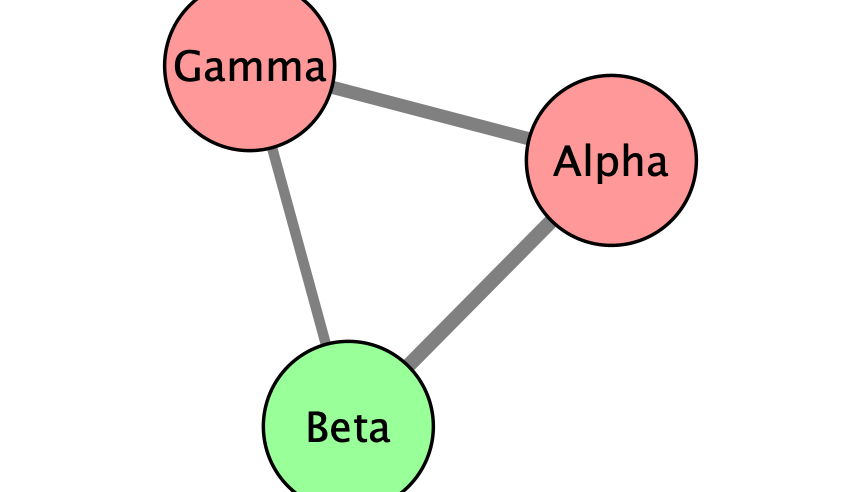

In [12]:
p4c.notebook_export_show_image()

## Understanding Styling in Cytoscape


Styles are divided into three main categories:

1. **Default**  
   Applies a uniform style to the entire network without exceptions.

2. **Mapping**  
   Dynamically applies styles to nodes and edges based on their attributes (e.g., node size based on degree, node color based on a expression levels).

3. **Bypass**  
   Directly overrides other styles for *selected* nodes or edges, providing targeted customization.

---

### Focus of This Tutorial: Mapping

In this tutorial, we’ll focus on **Mapping**, which allows you to create data-driven visualizations. You'll learn how to **MAP** node and edge attributes to various visual properties like color, size, and transparency. This approach makes your networks more insightful and visually compelling. 

## Introduction to Style Options

It would be helpful to have a basic understanding of the styling options available in Cytoscape. If you’re new to these concepts or need a refresher, we recommend reviewing the [*Styles* section in the Cytoscape manual](https://manual.cytoscape.org/en/stable/Styles.html#).

One of the best things about working with Cytoscape through py4cytoscape is that you don't need to rely solely on the graphical user interface to explore and interact with styles. You can retrieve all the style options programmatically, which makes the process more efficient and flexible. Whether you’re analyzing a large network or automating your workflow, this approach is invaluable.

However, one important note: while you can retrieve style options through code, identifying the shapes associated with specific names may still require referring to the Styles tab or this part of [Cytoscape documentation](https://manual.cytoscape.org/en/stable/Styles.html#available-shapes-and-line-styles) —unless you’re already familiar with them.


In [5]:
p4c.get_arrow_shapes() # List of all available arrow shapes.

['OPEN_CIRCLE',
 'T',
 'ARROW_SHORT',
 'NONE',
 'DELTA_SHORT_2',
 'DIAMOND_SHORT_1',
 'DIAMOND_SHORT_2',
 'HALF_TOP',
 'OPEN_SQUARE',
 'SQUARE',
 'HALF_BOTTOM',
 'OPEN_DELTA',
 'CROSS_OPEN_DELTA',
 'CIRCLE',
 'CROSS_DELTA',
 'DELTA_SHORT_1',
 'DIAMOND',
 'HALF_CIRCLE',
 'DELTA',
 'OPEN_HALF_CIRCLE',
 'OPEN_DIAMOND',
 'ARROW']

In [6]:
p4c.get_line_styles() # List of all available line styles

['EQUAL_DASH',
 'MARQUEE_DASH_DOT',
 'SOLID',
 'ZIGZAG',
 'PARALLEL_LINES',
 'MARQUEE_DASH',
 'SEPARATE_ARROW',
 'MARQUEE_EQUAL',
 'SINEWAVE',
 'BACKWARD_SLASH',
 'CONTIGUOUS_ARROW',
 'LONG_DASH',
 'VERTICAL_SLASH',
 'DOT',
 'FORWARD_SLASH',
 'DASH_DOT']

In [7]:
p4c.get_node_shapes() # List of all available node shapes

['TRIANGLE',
 'ELLIPSE',
 'HEXAGON',
 'DIAMOND',
 'PARALLELOGRAM',
 'VEE',
 'ROUND_RECTANGLE',
 'OCTAGON',
 'RECTANGLE']

In [8]:
p4c.get_visual_property_names() # Names of all visual properties.

['COMPOUND_NODE_PADDING',
 'COMPOUND_NODE_SHAPE',
 'DING_RENDERING_ENGINE_ROOT',
 'EDGE',
 'EDGE_BEND',
 'EDGE_CURVED',
 'EDGE_LABEL',
 'EDGE_LABEL_AUTOROTATE',
 'EDGE_LABEL_BACKGROUND_COLOR',
 'EDGE_LABEL_BACKGROUND_SHAPE',
 'EDGE_LABEL_BACKGROUND_TRANSPARENCY',
 'EDGE_LABEL_COLOR',
 'EDGE_LABEL_FONT_FACE',
 'EDGE_LABEL_FONT_SIZE',
 'EDGE_LABEL_POSITION',
 'EDGE_LABEL_ROTATION',
 'EDGE_LABEL_TRANSPARENCY',
 'EDGE_LABEL_WIDTH',
 'EDGE_LINE_TYPE',
 'EDGE_PAINT',
 'EDGE_SELECTED',
 'EDGE_SELECTED_PAINT',
 'EDGE_SOURCE_ARROW_SELECTED_PAINT',
 'EDGE_SOURCE_ARROW_SHAPE',
 'EDGE_SOURCE_ARROW_SIZE',
 'EDGE_SOURCE_ARROW_UNSELECTED_PAINT',
 'EDGE_STACKING',
 'EDGE_STACKING_DENSITY',
 'EDGE_STROKE_SELECTED_PAINT',
 'EDGE_STROKE_UNSELECTED_PAINT',
 'EDGE_TARGET_ARROW_SELECTED_PAINT',
 'EDGE_TARGET_ARROW_SHAPE',
 'EDGE_TARGET_ARROW_SIZE',
 'EDGE_TARGET_ARROW_UNSELECTED_PAINT',
 'EDGE_TOOLTIP',
 'EDGE_TRANSPARENCY',
 'EDGE_UNSELECTED_PAINT',
 'EDGE_VISIBLE',
 'EDGE_WIDTH',
 'EDGE_Z_ORDER',
 'NETWOR

### Filtering Visual Properties

When working with p4cytoscape styles, you might want to filter visual properties based on specific keywords, such as "location" This can help you quickly identify relevant properties for customization. You can take the following approaches:

#### Approach 1: Filtering with a List Comprehension

You can use a simple list comprehension to filter visual properties that contain the word "location" (case-insensitive). Here's how:

In [9]:
[i for i in p4c.get_visual_property_names() if "location" in i.lower()]

['NETWORK_CENTER_X_LOCATION',
 'NETWORK_CENTER_Y_LOCATION',
 'NETWORK_CENTER_Z_LOCATION',
 'NODE_X_LOCATION',
 'NODE_Y_LOCATION',
 'NODE_Z_LOCATION']

#### Approach 2: Creating a Reusable Function

If you need to filter visual properties by various keywords repeatedly, it's helpful to define a reusable function. Here's an example:

In [10]:
# Define a function to filter visual properties by a given keyword
def filter_properties(keyword : str):
    """
    Filter visual properties containing the specified keyword.

    Parameters:
        keyword (str): The keyword to search for in visual property names.

    Returns:
        list: A list of visual property names containing the keyword (case-insensitive).
    """
    return [i for i in p4c.get_visual_property_names() if keyword.lower() in i.lower()]

# Use the function to filter properties containing "location"
filter_properties("location")

['NETWORK_CENTER_X_LOCATION',
 'NETWORK_CENTER_Y_LOCATION',
 'NETWORK_CENTER_Z_LOCATION',
 'NODE_X_LOCATION',
 'NODE_Y_LOCATION',
 'NODE_Z_LOCATION']

#### Try It Yourself!

Experiment with different keywords, like `"color"`, `"transparency"`, or `"size"`. 

This simple function and list comprehension make it easy to explore and filter the extensive list of visual properties in Cytoscape.

## Loading Session
Let's generate a disease network with String database:

In [14]:
# Querying String database for ovarian cancer
string_cmd_list = ['string disease query','disease="ovarian cancer"', 'species="Homo sapiens"', 'limit=100', 'cutoff=0.9']
string_cmd = " ".join(string_cmd_list)
p4c.commands.commands_run(string_cmd)

["Loaded network 'STRING network - ovarian cancer' with 99 nodes and 395 edges"]

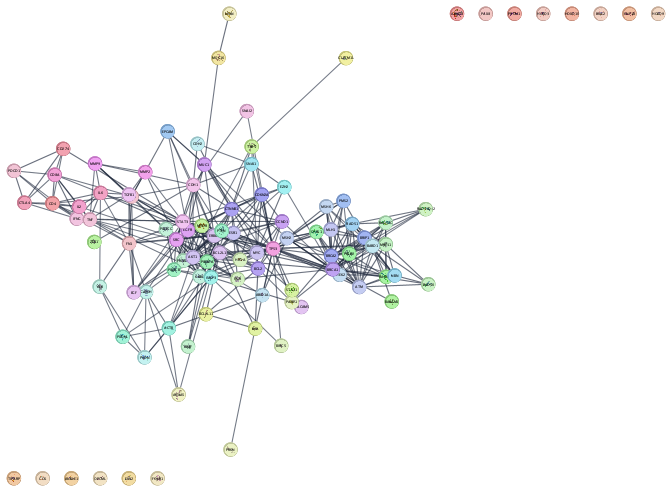

In [15]:
p4c.notebook_export_show_image()

Remove all the styling, so that we can apply ours. You don't need know how this is implemented at this point. Everything will be clear by the end of the tutorial.

In [16]:
all_styles = p4c.get_style_all_mappings('STRING - ovarian cancer')

[p4c.delete_style_mapping('STRING - ovarian cancer', i['visualProperty']) for i in all_styles]

['', '', '', '', '', '', '', '', '', '']

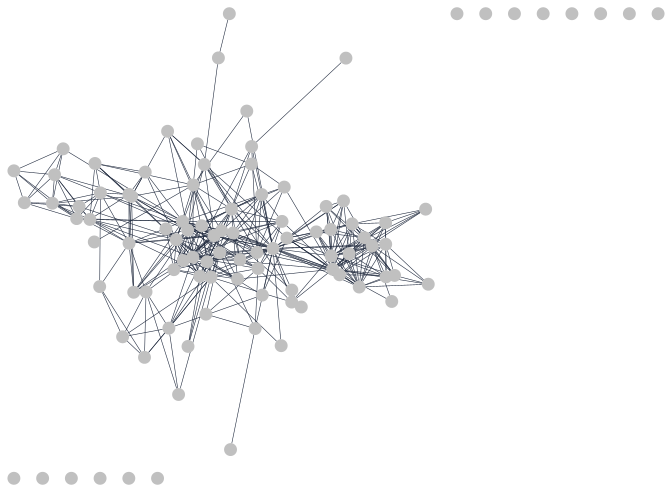

In [17]:
p4c.notebook_export_show_image()

## Starting with Defaults

Before diving into property mappings, we will start by exploring **default styles**. These represent the base styling applied to all nodes and edges in your network unless overridden by mappings or bypasses.

#### Retrieving Default Visual Properties

You can programmatically retrieve the default values of visual properties for a given style. For example, let’s check the default **node shape** in the "default" style:

In [41]:
# Retrieve the default node shape in the "STRING - ovarian cancer" style
p4c.get_visual_property_default('NODE_SHAPE', style_name='STRING - ovarian cancer')

'ELLIPSE'

#### What Does This Do?

The function **get_visual_property_default()** retrieves the current **default value** of a specified visual property for a given style. In this case:
- **'NODE_SHAPE'** specifies the visual property we are querying.
- **style_name='STRING - ovarian cancer'** ensures we are looking at the defaults for the "STRING - ovarian cancer" style.

---

#### Try It Yourself!
- Experiment with other visual properties, such as 'EDGE_WIDTH', 'NODE_FILL_COLOR', or 'NETWORK_BACKGROUND_PAINT'.  

### Customizing Default Visual Properties in Cytoscape

There are two approaches: using **specific functions** and the **general function** for setting defaults.

---

#### Specific Functions: Quick and Easy Customization

For most use cases, specific functions can be used to update default visual properties. These functions follow a consistent naming pattern:

```python
p4c.set_<property>_default(value, style_name='style')
```

- **`<property>`**: The visual property you want to customize (e.g., `node_shape`, `node_color`, etc.).  
- **`value`**: The desired default value (e.g., `'ELLIPSE'`, `50`, or a color like `'#D3D3D3'`).  
- **`style_name`**: (Optional) The name of the style to modify. Defaults to `'default'` if not specified.

For a full list of specific functions, refer to the [**Styles -> Style Defaults**](https://py4cytoscape.readthedocs.io/en/latest/reference/styles.html#module-py4cytoscape.style_defaults) section of the `py4cytoscape` documentation.

---

### General Function: Flexible Customization for All Properties

If a specific function isn’t available for a property, you can use the general-purpose `set_visual_property_default()` function. This function allows you to define the property and its value as a dictionary.

```python
p4c.set_visual_property_default(style_string, style_name='default')
```

- **`style_string`**: A dictionary specifying the visual property and its value. Example:  
  ```python
  {'visualProperty': 'NODE_SIZE', 'value': '35'}
  ```  
- **`style_name`**: (Optional) The name of the style to modify. Defaults to `'default'`.


In [128]:
# Set all nodes to have an Rectangle shape using the specific function
p4c.set_node_shape_default('RECTANGLE', style_name='STRING - ovarian cancer')

''

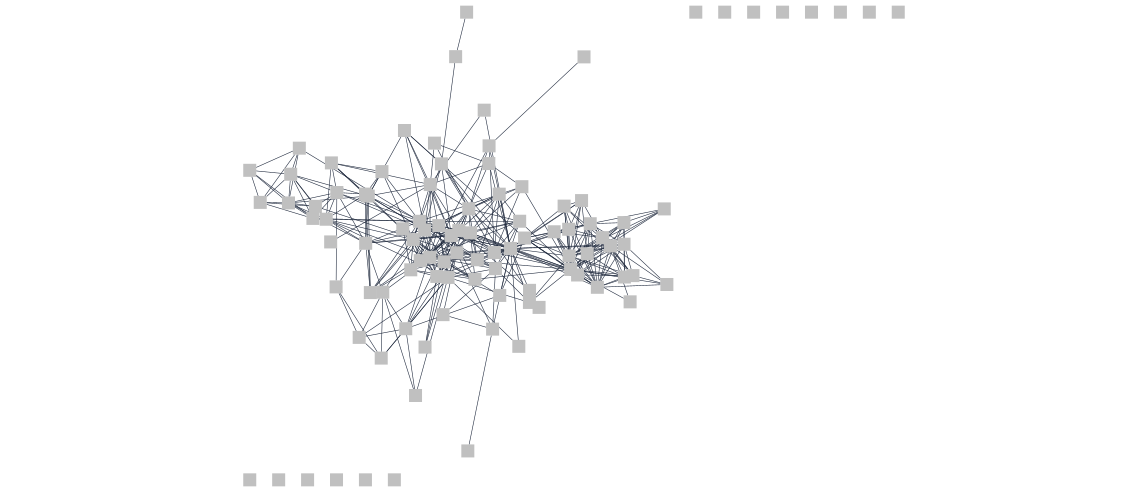

In [129]:
p4c.notebook_export_show_image()

In [131]:
# Set the default node shape to 'ELLIPSE' using the general function
style_string = {'visualProperty': 'NODE_SHAPE', 'value': 'ELLIPSE'}
p4c.set_visual_property_default(style_string, style_name='STRING - ovarian cancer')

''

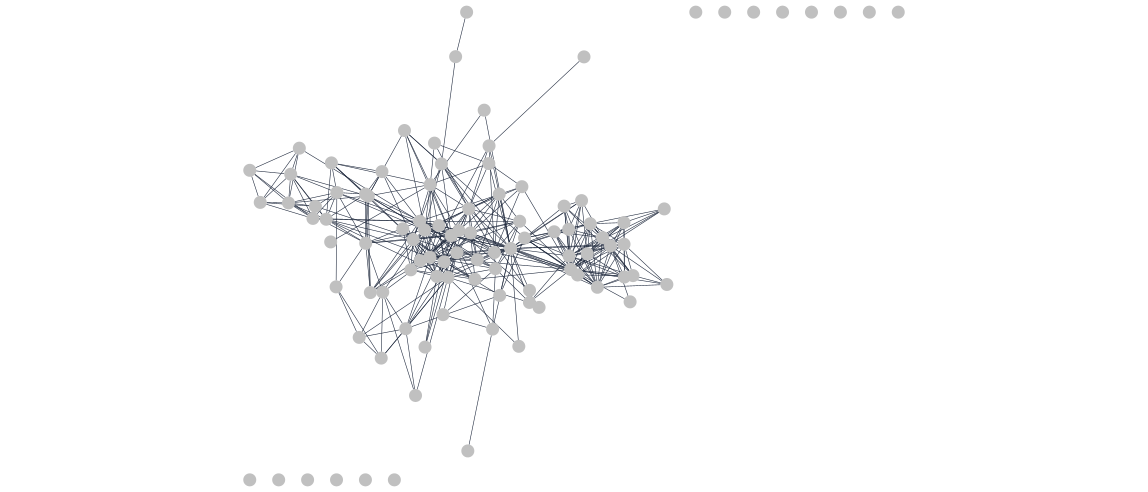

In [132]:
p4c.notebook_export_show_image()

#### Key Functions for Default Styling

Here’s a quick overview of commonly used functions:  
- **set_node_shape_default()**: Sets the default shape for nodes (e.g., 'ELLIPSE', 'RECTANGLE').  
- **set_node_size_default()**: Adjusts the default size of nodes.  
- **set_node_color_default()**: Changes the default color of nodes (using hex codes, e.g., '#D3D3D3').  
- **set_node_border_width_default()**: Sets the width of the node border.  
- **set_node_font_size_default()**: Adjusts the default font size for node labels.  

Again, a complete list can be found in the [*Styles -> Style Defaults*](https://py4cytoscape.readthedocs.io/en/latest/reference/styles.html#module-py4cytoscape.style_defaults) section of the py4cytoscape documentation. 

These functions allow you to programmatically define the look and feel of your network. Before applying advanced mappings or customizations to make your network more dynamic

In [15]:
# p4c.set_visual_style('STRING - ovarian cancer')
# p4c.set_node_shape_default('ELLIPSE', style_name='STRING - ovarian cancer')
# p4c.set_node_size_default(50, style_name='STRING - ovarian cancer')
# p4c.set_node_color_default('#D3D3D3', style_name='STRING - ovarian cancer')
# p4c.set_node_border_width_default(2, style_name='STRING - ovarian cancer')
# p4c.set_node_color_default('#616060', style_name='STRING - ovarian cancer')
# p4c.set_node_font_size_default(14, style_name='STRING - ovarian cancer')

## What is Styling with Mapping?


### Types of Mappings

When customizing styles, you can map data attributes to visual properties using three types of mappings:

1. **Continuous Mappings**  
2. **Discrete Mappings**
3. **Passthrough Mappings**

Read in detail about these in the documentation [here](https://manual.cytoscape.org/en/stable/Styles.html#how-mappings-work)

---

You may need to check how your data is mapped to visual properties in a style, similar to default styling. These functions can help you review your work and troubleshoot issues:

In [47]:
# This function returns the active mapping for a specific property. It returns an error if no mappings are defined for that property
# p4c.get_style_mapping('STRING - ovarian cancer', 'NODE_FILL_COLOR')

# We will try to run these after defining some mappings

In [48]:
# This function returns all the active mappings for all the properties
p4c.get_style_all_mappings('STRING - ovarian cancer')

[]

In [49]:
# This function is used to delete active mappings
p4c.delete_style_mapping('STRING - ovarian cancer', 'NODE_FILL_COLOR')

### Continuous Mappings

We’ll first dive into **Continuous Mappings**, which are ideal for visualizing numerical data. For example, you can use a continuous mapping to size nodes based on a "weight" attribute or create a color gradient to represent values like "score" or "expression level."

In this example, we’ll map the "Disease Score" node attribute to the Node Fill Color in the 'STRING - ovarian cancer' style. This allows us to use a gradient of colors to represent the range of values for this attribute.

In [51]:
# Map 'Disease Score' to Node Fill Color
# Range: 2.898488 (yellow) to 5.0 (red)
p4c.set_node_color_mapping(
    'stringdb::disease score',             # Attribute to map
    [2.898488, 5.0],                       # Range of attribute values
    ['#FBE723', '#ff003c'],                # Gradient colors: yellow to red
    mapping_type='c',                      # Mapping type : continuous
    style_name='STRING - ovarian cancer'   # Style to modify
)

# Notice that to use this function, you have to know the range of attribute values for meaning results

''

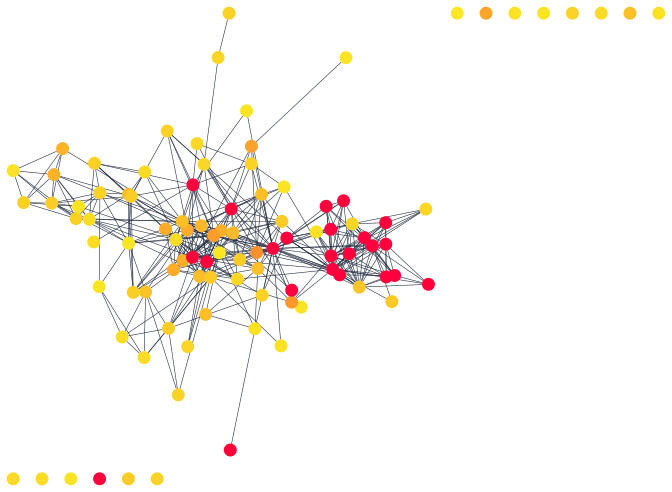

In [52]:
p4c.notebook_export_show_image()

Observe how the node colors transition seamlessly from yellow to orange to red, creating a gradient that reflects the range of values.

### Key Observations:
1. Proteins strongly associated with ovarian cancer tend to cluster together.  
2. Proteins with slightly lower associations are often positioned near the strongly associated cluster.

### Discrete Mapping

Discrete mappings are used to assign specific visual properties to distinct categories of data. For example, you can map node shapes, colors, or border styles based on a categorical attribute like "Node Type"(example: protein, enzyme, gene).

In a discrete mapping, each unique value in the data is paired with a specific visual property. For instance:  
- Nodes of type "Protein" could be blue, while "Gene" nodes are green.  
- Edges labeled "Activation" might be solid lines, while "Inhibition" edges are dashed.

This approach is perfect for visually distinguishing different groups or classes in your network. It makes patterns and relationships between categories easier to identify at a glance!

### Example: Discrete Mapping with Target Development Level (TDL)

Discrete mapping is perfect for visualizing categories like **Target Development Levels (TDL)**. TDL classifies human proteins into four categories based on available knowledge:  
- **Tclin**: Targets with approved drugs.  
- **Tchem**: Proteins binding small molecules with high potency.  
- **Tbio**: Proteins with experimental Gene Ontology annotations.  
- **Tdark**: Understudied proteins with limited data.  

Using discrete mapping, you could assign a unique color or shape to each TDL category, making it easy to identify these groups in your network. For instance, "Tdark" nodes could appear VEE shape to make them stand out. 

In [18]:
p4c.set_node_shape_mapping('target::development level',
                           ['Tchem', 'Tbio', 'Tclin', 'Tdark'], 
                           ['Rectangle', 'Hexagon', 'Diamond', 'VEE'],
                           default_shape='Ellipse',                      # Default shape for all unmapped values
                           # mapping_type = 'd', discrete is the only available option for this function
                           style_name='STRING - ovarian cancer')

# Notice that you need to all the categories and the shapes, in these scenerios.

''

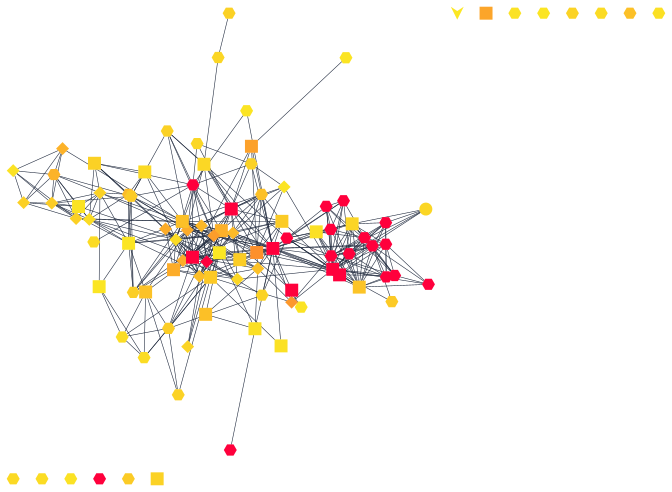

In [54]:
p4c.notebook_export_show_image()

### Key Observations:  
1. The network contains an equal number of **Tchem** and **Tbio** proteins.  
2. There are a few **Tclin** proteins.  
3. Only one **Tdark** protein is present in the network.  

---

### Highlighting Specific Categories  

Depending on what we want to emphasize, we can adjust the node sizes to draw attention to specific proteins.  

For instance, if we are particularly interested in **Tclin** and **Tdark** proteins, we can apply discrete mappings to these two categories. This allows us to make these nodes stand out visually, making it easier to focus on them in the network.  

In [19]:
p4c.set_node_size_mapping('target::development level',
                           ['Tclin', 'Tdark'], 
                           [70, 70],
                           mapping_type= "d",
                           style_name='STRING - ovarian cancer')

# Since you will be interested to highlight only some parts of the data, this is still manageable.

''

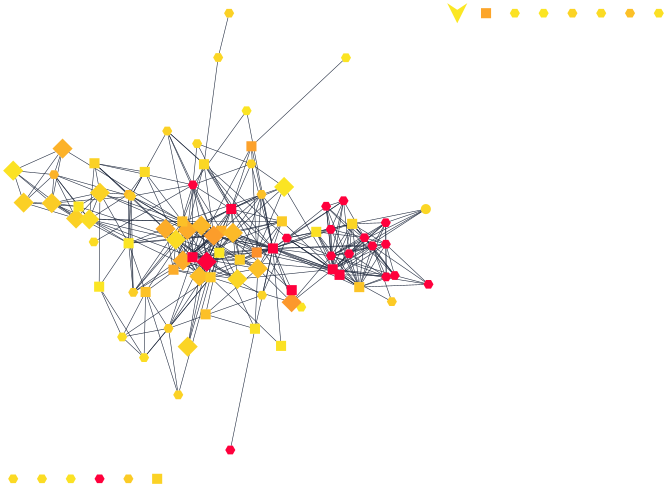

In [56]:
p4c.notebook_export_show_image()

Key Observation:
- Only 1 protein that is highly associated with ovarian cancer in our network can be targeted by Drugs.
- Many proteins mildly associated with ovaraian cancer can be targeted with Drugs.

### Passthrough Mappings

Passthrough mappings are used to directly display data from your attribute table as visual properties. For example, you can use a column of data to set node labels, edge labels, or tooltip text.

In passthrough mapping, the data values are passed directly to the visual property without any transformation. For instance:  
- A node's "Name" attribute can be displayed as its label.  
- An edge's "Weight" attribute can appear as a tooltip.  

This type of mapping is ideal for showing raw data in your visualization, making it easier to identify individual elements and their attributes at a glance.

In [20]:
p4c.set_node_label_mapping('display name',
                           style_name='STRING - ovarian cancer')
# This function only supports passthrough mapping.

''

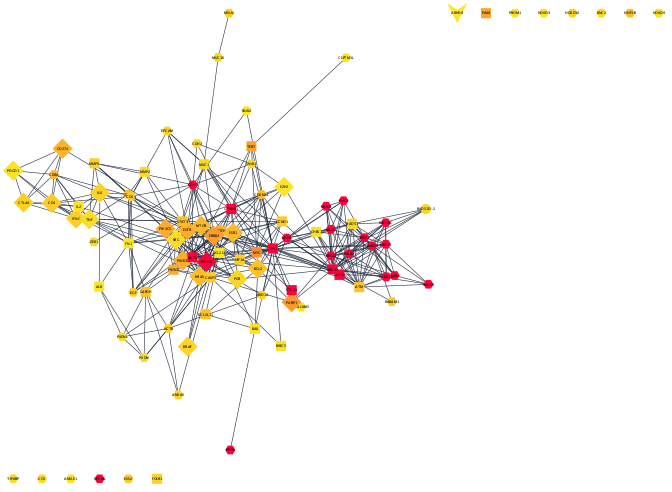

In [59]:
p4c.notebook_export_show_image()

And just like that you now understand the basics of Styling with Mapping node / edge attributes. 

There are many things that can be done to make this network more readable, interesting. We encourage you to perfect this network to your likings, to hone in your learnings today.

But before we wrap this up, there is one final concept that will make all of this very easy.

## Value Generators

Value generators simplify the process of creating discrete or continuous mappings by automatically linking attribute data to visual properties. 

They identify the unique values in a node or edge attribute and let you map them to colors, sizes, opacities, or shapes with ease.

For example:  
- A **Degree** attribute with values 1, 10, and 20 can be mapped to:  
  - Node fill colors like **Red, Blue, and Green**.  
  - Node sizes like **100, 150, and 200**.  
  - Shapes like **circle, square, and diamond**.  

This feature streamlines the mapping process, especially for large datasets, and helps you create clear, meaningful visualizations effortlessly.

For example in this example from below

```python
# Map 'Disease Score' to Node Fill Color
# Range: 2.898488 (yellow) to 5.0 (red)
p4c.set_node_color_mapping(
    'stringdb::disease score',             # Attribute to map
    [2.898488, 5.0],                       # Range of attribute values
    ['#FBE723', '#ff003c'],                # Gradient colors: yellow to red
    mapping_type='c',                      # Mapping type : continuous
    style_name='STRING - ovarian cancer'   # Style to modify
)
```

To set a node’s fill color based on its 'Disease score' attribute using a continuos style mapping function, you could use the longhand (without value generator) where you know the unique Degree values in advance and choose specific colors to represent them: To map attributes to a gradient of colors.

Or, you can use the following code:

In [21]:
# Gradient colors: yellow to red

p4c.set_node_color_mapping(
    **p4c.gen_node_color_map('stringdb::disease score',             # Attribute to map
                            p4c.palette_color_brewer_s_YlOrRd(),    # Generated Gradient colors
                            mapping_type="c",                       # mapping_type='c',
                            style_name='STRING - ovarian cancer')   # Style to modify
)

''

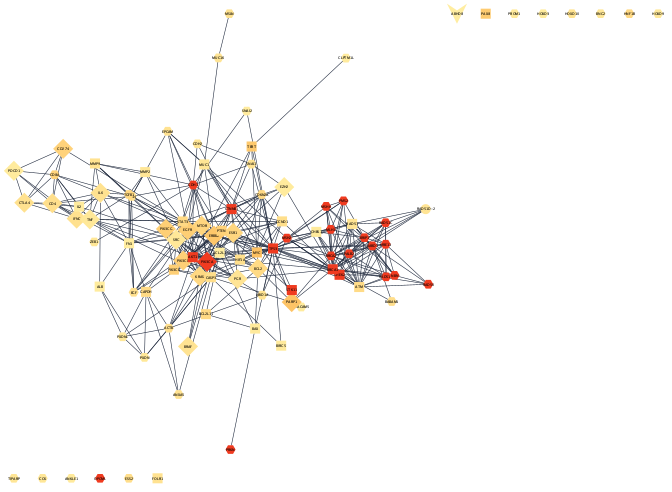

In [22]:
p4c.notebook_export_show_image()

Similar Generator function is also available for shapes

In [23]:
p4c.set_node_shape_mapping(
    **p4c.gen_node_shape_map('target::development level',       # Attribute name to map
                           # mapping_type = 'd', discrete is the only available option for this function
                           style_name='STRING - ovarian cancer' # Style that we are using
                            )
)

''

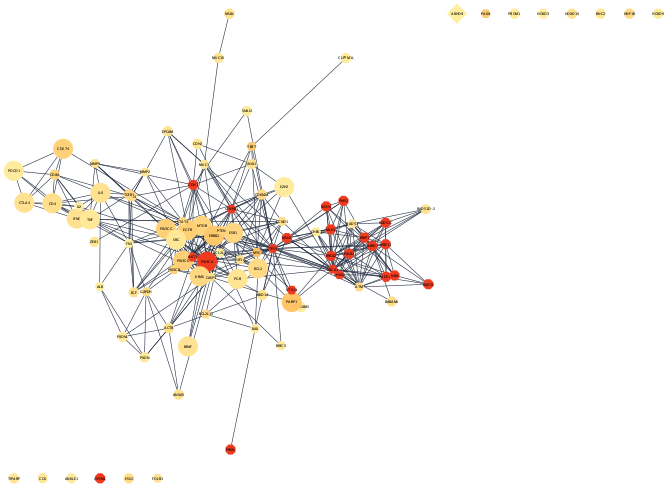

In [24]:
p4c.notebook_export_show_image()

Now you won't have to know maximum and minimum of range of values of the attribute, and all the options available

We encourage you to read [*Value Generator*](https://py4cytoscape.readthedocs.io/en/stable/concepts.html#value-generators) section of the documentation for more information

The full list of all the generator functions [here](https://py4cytoscape.readthedocs.io/en/latest/reference/styles.html#module-py4cytoscape.style_auto_mappings)

In [25]:
p4c.get_style_mapping('STRING - ovarian cancer', 'NODE_FILL_COLOR') # As promised here is the mapping for Node Fill Color

{'mappingType': 'continuous',
 'mappingColumn': 'stringdb::disease score',
 'mappingColumnType': 'Double',
 'visualProperty': 'NODE_FILL_COLOR',
 'points': [{'value': 2.898488,
   'lesser': '#FFEDA0',
   'equal': '#FFEDA0',
   'greater': '#FFEDA0'},
  {'value': 3.949244,
   'lesser': '#FEB24C',
   'equal': '#FEB24C',
   'greater': '#FEB24C'},
  {'value': 5.0,
   'lesser': '#F03B20',
   'equal': '#F03B20',
   'greater': '#F03B20'}]}

In [26]:
p4c.get_style_all_mappings('STRING - ovarian cancer') # All the mappings listed

[{'mappingType': 'discrete',
  'mappingColumn': 'target::development level',
  'mappingColumnType': 'String',
  'visualProperty': 'NODE_SHAPE',
  'map': [{'key': 'Tbio', 'value': 'OCTAGON'},
   {'key': 'Tdark', 'value': 'DIAMOND'},
   {'key': 'Tclin', 'value': 'ELLIPSE'},
   {'key': 'Tchem', 'value': 'HEXAGON'}]},
 {'mappingType': 'passthrough',
  'mappingColumn': 'display name',
  'mappingColumnType': 'String',
  'visualProperty': 'NODE_LABEL'},
 {'mappingType': 'discrete',
  'mappingColumn': 'target::development level',
  'mappingColumnType': 'String',
  'visualProperty': 'NODE_SIZE',
  'map': [{'key': 'Tdark', 'value': '70.0'},
   {'key': 'Tclin', 'value': '70.0'}]},
 {'mappingType': 'continuous',
  'mappingColumn': 'stringdb::disease score',
  'mappingColumnType': 'Double',
  'visualProperty': 'NODE_FILL_COLOR',
  'points': [{'value': 2.898488,
    'lesser': '#FFEDA0',
    'equal': '#FFEDA0',
    'greater': '#FFEDA0'},
   {'value': 3.949244,
    'lesser': '#FEB24C',
    'equal': '#

## Further Reading

1. [Ten simple rules to create biological network figures for communication](https://cytoscape.org/cytoscape-tutorials/presentations/modules/ten-simple-rules/index.html#/)
2. [Basic Data Visualization](https://github.com/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/basic-data-visualization.ipynb)